# AI Tools Lab

# AIX360 vs InterpretML
## using LIME for Breast Cancer Classification

### by Amine Ben Ayed & Philipp Scholl, Goethe-Universität Frankfurt, Summer Semester 2020

### Code for model training adapted from: https://github.com/Elhamkesh/Breast-Cancer-Scikitlearn

In [2]:
########################
# Breast Cancer Dataset
# use Breast Cancer Wisconsin (Diagnostic) Database 
#######################
# what we apply in this project:
# KNN
# Logistic Regression
# Decision Tree
# Random Forests
# Neural Network
# SVM
#########################

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
#import graphviz
%matplotlib inline

# Data Exploration

In [4]:
#load the breast cancer data and few EDA
cancer = load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print(cancer.target_names)

['malignant' 'benign']


In [8]:
cancer.data.shape

(569, 30)

## Training different classifiers

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

### K-Nearest Neighbor

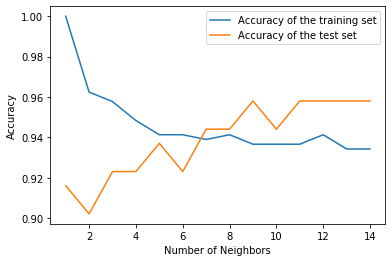

In [10]:
#----------KNN Classifier 

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#by looking at plot, best result accurs when n_neighbors is 6

In [11]:
print("Accuracy of the training set for 7NN: {:3f}".format(training_accuracy[6]))
print("Accuracy of the test set for 7NN: {:3f}".format(test_accuracy[6]))

Accuracy of the training set for 7NN: 0.938967
Accuracy of the test set for 7NN: 0.944056


### Logistic Regression

In [12]:
#----------------Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#It seems as it does better than KNN

Accuracy on the training set: 0.960
Accuracy on the training set: 0.958


C:\Users\Public\MyPrograms\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree

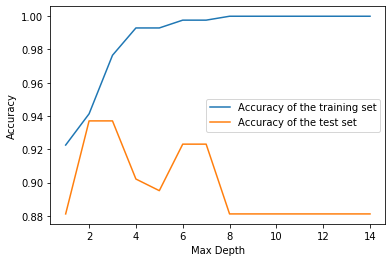

In [13]:
#----------------- Decision Tree

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

In [14]:
export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

In [15]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.0096886  0.         0.         0.         0.
 0.         0.71160121 0.         0.         0.01948008 0.
 0.         0.01676117 0.017502   0.         0.         0.
 0.         0.         0.         0.06706044 0.         0.11373562
 0.         0.03421113 0.00995974 0.         0.         0.        ]


numpy.ndarray

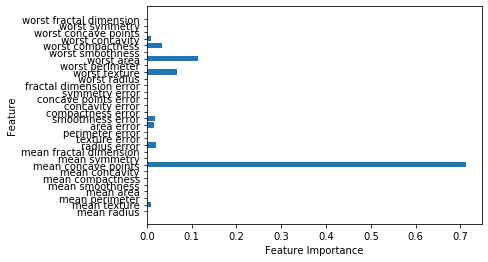

In [16]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [17]:
# Decision Tress perform well and we don't need to standardize features
# But as you see, it can easilly overfit 

### Random Forest

In [18]:
# ---------------- Random Forests

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 1.000
acc for test data: 0.972


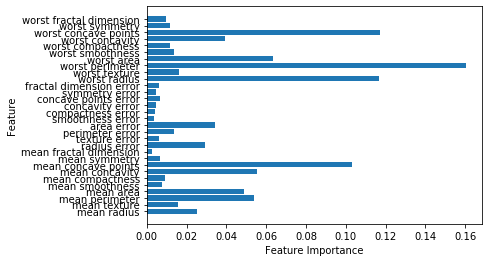

In [20]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [21]:
# Random Forest perform well and we don't need to standardize features
# Better than DT because of randomization
# It may not work well with sparse data

### Neural Network

In [22]:
# ------------- Neural Network

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.939
acc for test data: 0.916


In [23]:
print('The max per each feature:\n{}'.format(cancer.data.max(axis=0)))

The max per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [24]:
#let's improve on NN

In [25]:
#1- Scaling X data
scaler = StandardScaler()
X_train_NN = scaler.fit(X_train).transform(X_train)
X_test_NN = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_NN, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_NN, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_NN, y_test)))

acc for training data: 1.000
acc for test data: 0.958


In [26]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
#2- change alpha
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_NN,y_train)
print('acc for training data: {:.3f}'.format(mlp.score(X_train_NN, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_NN, y_test)))

acc for training data: 0.986
acc for test data: 0.972


In [28]:
#we can play around with other hyper parameter to improve the performance

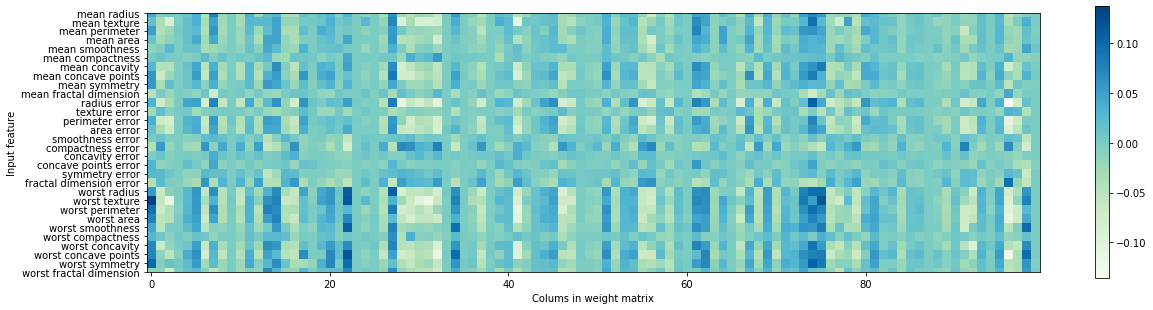

In [29]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Colums in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [30]:
# by looking at the heatmap it seems as from "smoothness error" till "fractal dimention error" does not play a huge role, 
# also "mean smoothness"

In [31]:
# NN can get better result in larger datasets
# we can tune a lot of parameter
# but data may need pre-processing

#other library for NN:
# theano
# keras
# tensorflow

### Support Vector Machine

In [32]:
# --------- SVM (Support Vector Machine)

svm = SVC(probability=True)
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))

acc on train dataset: 1.000
acc on test dataset: 0.629


C:\Users\Public\MyPrograms\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
#it mean we overfit into our train dataset
# we can change hyper parameter to improve the model
# one way it to apply scaling

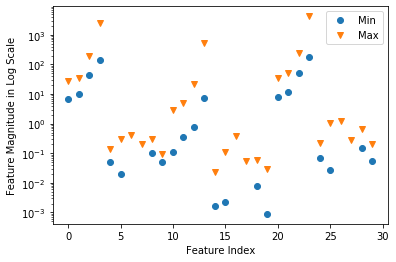

In [34]:
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [35]:
# We can see that there are huge diffrence between min and max and between diffrent features

In [36]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_SVM = (X_train - min_train)/range_train
X_test_SVM = (X_test - min_train)/range_train

print('Min per feature\n{}'.format(X_train_SVM.min(axis=0)))
print('Max per feature\n{}'.format(X_train_SVM.max(axis=0)))

Min per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Max per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [37]:
svm = SVC(probability=True)
svm.fit(X_train_SVM, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_SVM, y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_SVM, y_test)))

acc on train dataset: 0.948
acc on test dataset: 0.951


C:\Users\Public\MyPrograms\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
# we did much better now, but now we are underfitting
# to fix it we need change hyper parameters

In [39]:
svm = SVC(probability=True, C=1000)
svm.fit(X_train_SVM, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_SVM, y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_SVM, y_test)))

acc on train dataset: 0.988
acc on test dataset: 0.972


C:\Users\Public\MyPrograms\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
# For SVM:
# can work well on high dimensional data with smaller sample size
# but don't perform well on high dim with lots of sample (>100K)
# DT or RF can be better choice, because they require less/no preprocessing of data, easier to understand and visualize

![](cancerTree.dot)

# LIME

Code by Amine Ben Ayed & Philipp Scholl

In [41]:
from interpret.blackbox import LimeTabular
from interpret import show

In [42]:
# Need to change type of feature names for InterpretML
model_feats = cancer.feature_names.tolist()
print(type(model_feats))
print(type(cancer.feature_names))

<class 'list'>
<class 'numpy.ndarray'>


In [43]:
#Blackbox explainers need a predict function, and optionally a dataset

# Random Forest
lime_RF = LimeTabular(predict_fn=forest.predict_proba, data=X_train, feature_names=model_feats, class_names=cancer.target_names)

# Support Vector Machine
lime_SVM = LimeTabular(predict_fn=svm.predict_proba, data=X_train_SVM, feature_names=model_feats, class_names=cancer.target_names)

# Neural Network
lime_NN = LimeTabular(predict_fn=mlp.predict_proba, data=X_train_NN, feature_names=model_feats, class_names=cancer.target_names)

In [44]:
#Pick the instances to explain, optionally pass in labels if you have them

exp_RF = lime_RF.explain_local(X_test[60:70], y_test[60:70], name="Random Forest")
exp_SVM = lime_SVM.explain_local(X_test_SVM[60:70], y_test[60:70], name="Support Vector Machine")
exp_NN = lime_NN.explain_local(X_test_NN[60:70], y_test[60:70], name="Neural Network")

In [45]:
show(exp_RF)

<!-- http://127.0.0.1:7861/2421936821064/ -->

In [46]:
show(exp_SVM)

<!-- http://127.0.0.1:7861/2421949285832/ -->

In [47]:
show(exp_NN)

<!-- http://127.0.0.1:7861/2421948224712/ -->